In [1]:
import os
ROOT ="/"
os.chdir(ROOT)
os.getcwd()
os.listdir()

['usr',
 'home',
 'sys',
 'bin',
 'mnt',
 'proc',
 'media',
 'tmp',
 'root',
 'opt',
 'etc',
 'dev',
 'var',
 'lib',
 'srv',
 'sbin',
 'lib64',
 'run',
 'boot',
 'content',
 '.dockerenv',
 'datalab',
 'tools',
 'python-apt',
 'lib32',
 'NGC-DL-CONTAINER-LICENSE']

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
img_path ='/content/car yellow.jpg'

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 # opencv

ModuleNotFoundError: No module named 'cv2'

In [12]:
car1= mpimg.imread(img_path)
car1.shape  

(146, 195, 3)

In [6]:
type(car1)  

numpy.ndarray

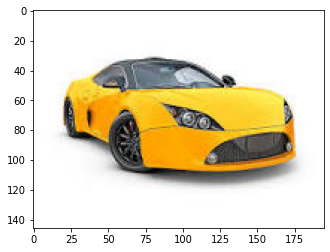

In [7]:
plt.imshow(car1)

In [21]:
car1[0][0]
# car1

array([255, 255, 255], dtype=uint8)

In [13]:
car1_cv2 = cv2.imread(img_path)

In [16]:
# cv2.imshow(img_path,car1_cv2) # Will work only in local pc

In [17]:
from google.colab.patches import cv2_imshow

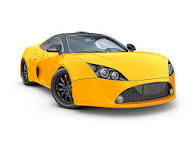

In [18]:
cv2_imshow(car1_cv2)

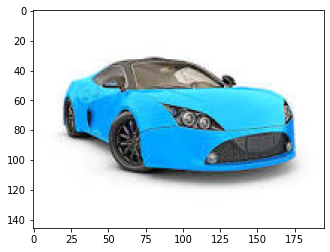

In [19]:
plt.imshow(car1_cv2)  # cv2 reads images as BGR and in matplotlib reads as RGB

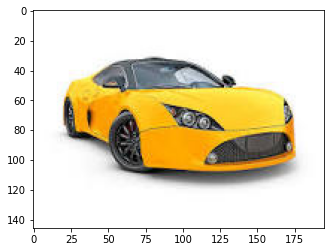

In [22]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

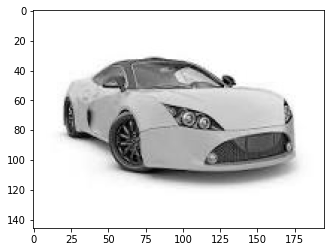

In [25]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY,cmap="gray")

In [26]:
car1_cv2_BGR_GRAY.min(),car1_cv2_BGR_GRAY.max()

(0, 255)

\\

---
**bold text**
## Understanding Composition of Colored Images

In [35]:
def visualize_RGB_channel(imgArray=None,figsize=(10,7)):
  #splitting the RGB components
  B,G,R = cv2.split(imgArray)
  #create zero matrix of shape of image
  Z = np.zeros(B.shape,dtype=B.dtype) # can use any chanel
  #init subplots
  
  fig, ax = plt.subplots(2,2, figsize=figsize)
  #plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]
  
  ax[0,0].set_title("Original Image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

  

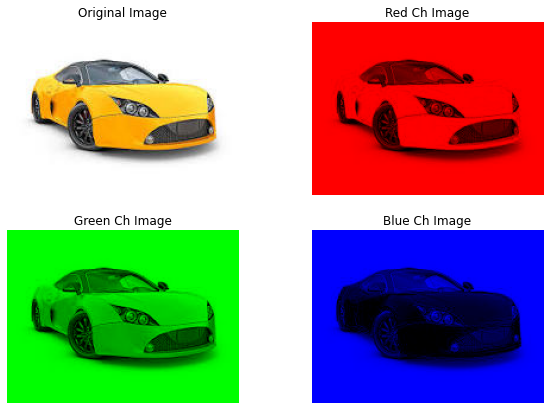

In [36]:
visualize_RGB_channel(imgArray=car1_cv2)

In [37]:
random_colored_img = np.random.randint(0,255,(6,6,3))
random_colored_img.shape

(6, 6, 3)

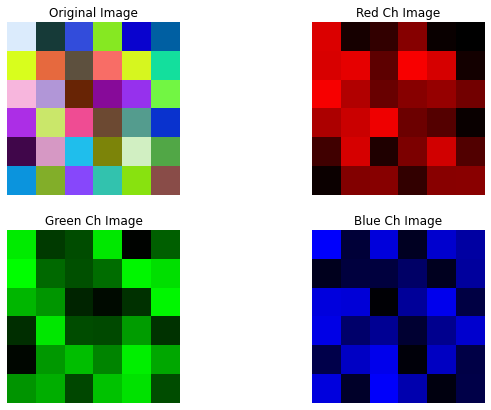

In [38]:
visualize_RGB_channel(imgArray=random_colored_img)

In [5]:
import numpy as np

## Understanding filters

In [6]:
sobel = np.array([[1,0,-1],
                 [2,0,-2],
                 [1,0,-1]])
print("Highlighting Vertical edges:\n",sobel)

Highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [7]:
print("Highlighting Horizontal edges:\n",sobel.T)

Highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [8]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

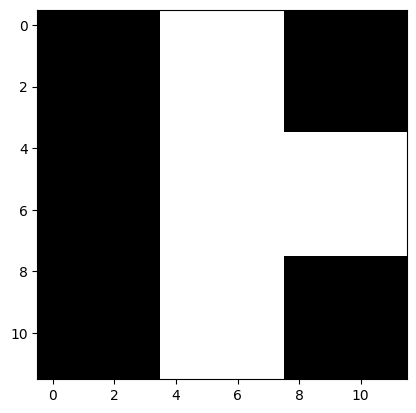

In [16]:
plt.imshow(example1,cmap='gray')

In [11]:
def simple_conv(imgFilter=None, picture=None):
  # extract the shape of the image
  p_row, p_col = picture.shape

  k = imgFilter.shape[0] # k =3

  temp = list()

  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontal right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)
  
  resulant_image = np.array(temp).reshape(final_rows, final_cols) # converting array to image again
  return resulant_image

In [12]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

In [87]:
sobel # vertical edges of image

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [88]:
k=3 
v_stride =0
h_stride = 0 + 1 + 1
target_area = example1[v_stride:v_stride + k, h_stride:h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [89]:
sum(sum(target_area*sobel))

-1020

In [53]:
sobel = np.array([[1,1,0],
                 [0,0,0],
                 [0,0,0]])

In [54]:
example1 = [
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
            ]

example1 = np.array(example1)

In [55]:
result = simple_conv(imgFilter=sobel, picture=example1)
result

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

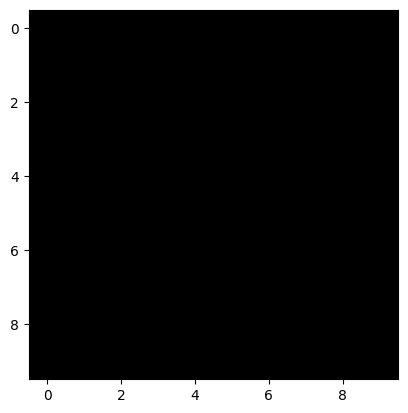

In [56]:
plt.imshow(result,cmap='gray')

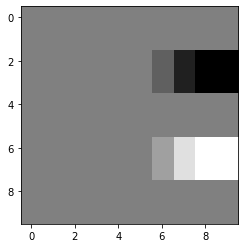

In [104]:
result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

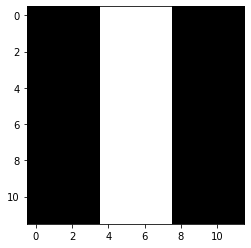

In [105]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
]
example2= np.array(example2)
plt.imshow(example2, cmap="gray")

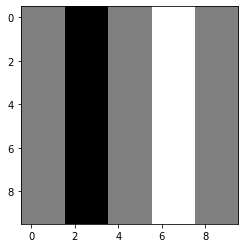

In [106]:
result = simple_conv(imgFilter=sobel, picture=example2) # vertical edges of image
plt.imshow(result,cmap='gray')

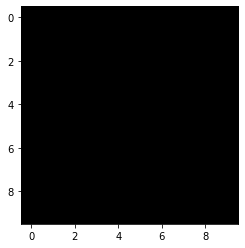

In [107]:
result = simple_conv(imgFilter=sobel.T, picture=example2) # Horizontal images
plt.imshow(result, cmap="gray")

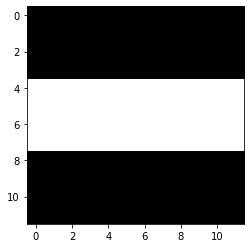

In [112]:
example2_T = np.array(example2.T)
plt.imshow(example2.T,cmap="gray") # horizontal image

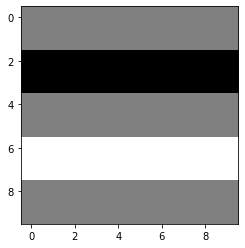

In [113]:
result = simple_conv(imgFilter=sobel.T, picture=example2_T)
plt.imshow(result, cmap="gray")

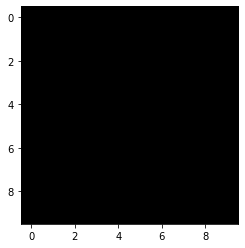

In [114]:
result = simple_conv(imgFilter=sobel, picture=example2_T)
plt.imshow(result, cmap="gray")

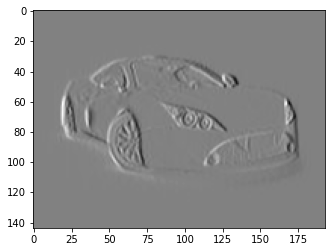

In [115]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

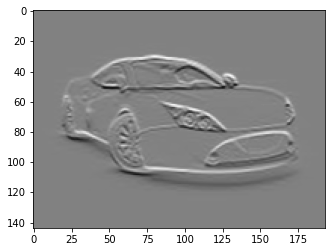

In [116]:
result = simple_conv(imgFilter=sobel.T, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [117]:
car1_cv2_BGR_GRAY.shape

(146, 195)

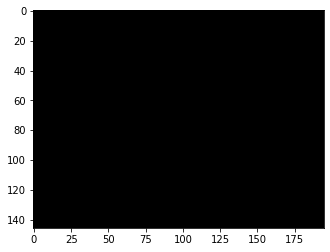

In [118]:
nothing = np.zeros(car1_cv2_BGR_GRAY.shape)
plt.imshow(nothing, cmap="gray")

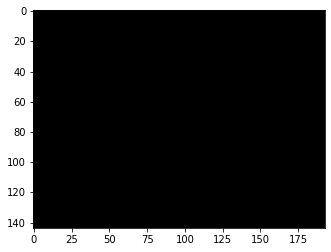

In [119]:
result = simple_conv(imgFilter=sobel.T, picture=nothing)
plt.imshow(result, cmap="gray")

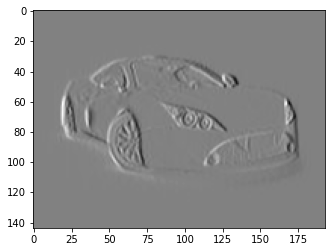

In [122]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [129]:
random_f = np.random.randn(3,3)
random_f

array([[ 0.92817705,  1.44379594, -1.08794649],
       [-2.23537369,  0.06723693,  3.17397686],
       [-0.27605979, -0.09109965,  0.56896501]])

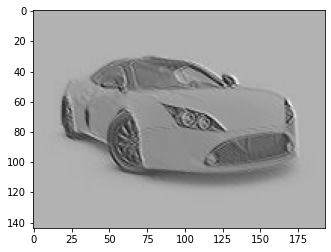

In [130]:
result = simple_conv(imgFilter=random_f, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")